In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define File Path
complete = "ufc_complete.csv"

# Read CSV
data = pd.read_csv(complete)

In [3]:
target = data["Winner_Blue"]
target_names = ["Lost", "Won"]

In [4]:
data = data.drop("Winner_Blue", axis=1)
feature_names = data.columns
data.head()

,no_of_rounds,B_current_lose_streak,B_current_win_streak,R_current_lose_streak,R_current_win_streak,B_total_rounds_fought,R_total_rounds_fought,B_wins,R_wins,B_Height_cms,...,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,weight_buckets_Heavy,weight_buckets_Light,weight_buckets_Middle
0,2,0.0,3.0,0.0,2.0,3.0,2.0,3.0,2.0,182.88,...,0,1,0,0,1,0,0,1,0,0
1,2,0.0,1.0,2.0,0.0,1.0,3.0,1.0,0.0,187.96,...,1,0,0,0,1,0,0,1,0,0
2,2,0.0,0.0,0.0,1.0,0.0,5.0,0.0,4.0,180.34,...,1,0,0,0,0,1,0,1,0,0
3,3,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,187.96,...,1,0,0,0,0,1,0,1,0,0
4,3,0.0,0.0,1.0,0.0,0.0,13.0,0.0,4.0,182.88,...,0,1,0,0,1,0,0,0,0,1


In [5]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6482694106641721

In [7]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.09202045781405452, 'elevation (ft)'),
 (0.08589270737923135, 'R_age'),
 (0.08340718947387155, 'R_total_rounds_fought'),
 (0.07723210572318978, 'B_age'),
 (0.07178639533393194, 'B_total_rounds_fought'),
 (0.06876981352867602, 'B_Reach_cms'),
 (0.06752359321676556, 'R_Reach_cms'),
 (0.06261595736286692, 'B_Height_cms'),
 (0.06180474343491411, 'R_Height_cms'),
 (0.05566230650911672, 'R_wins'),
 (0.04811270326726879, 'B_wins'),
 (0.030329080252918698, 'R_current_win_streak'),
 (0.027263935692609285, 'B_current_win_streak'),
 (0.023790622337262365, 'R_current_lose_streak'),
 (0.022224979747938082, 'B_current_lose_streak'),
 (0.012941517161741592, 'R_Stance_Orthodox'),
 (0.012357830203495745, 'B_Stance_Orthodox'),
 (0.011779680078304594, 'B_Stance_Southpaw'),
 (0.011616642073341487, 'R_Stance_Southpaw'),
 (0.011443000387839493, 'weight_buckets_Middle'),
 (0.010341180779652584, 'b_hot_or_not'),
 (0.010136480461175228, 'r_hot_or_not'),
 (0.009152652325134871, 'weight_buckets_Light'),
 (0.0

In [8]:
predictions = rf.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1, 0, 0, 1, 0, 1, 0, 0, 1, 0]
First 10 Actual labels: [0, 0, 0, 1, 0, 1, 0, 0, 0, 0]


In [9]:
compare = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
compare.head(50)

,Prediction,Actual
0,1,0
1,0,0
2,0,0
3,1,1
4,0,0
5,1,1
6,0,0
7,0,0
8,1,0
9,0,0


In [11]:
results = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
values = []
names = []

for x in range(len(results)):
    values.append(results[x][0])
    names.append(results[x][1])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 <a list of 31 Text xticklabel objects>)

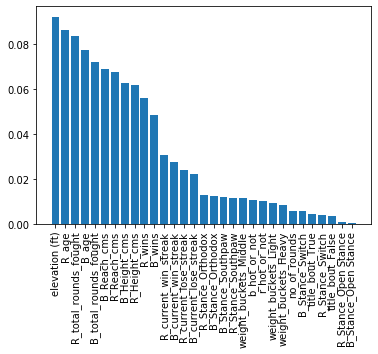

In [12]:
plt.bar(names, values)
plt.xticks(rotation=90)